<a href="https://colab.research.google.com/github/AfifahNofa/PCVK_Ganjil_2022/blob/main/TI_3B_Kelompok_8_UASPCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

UAS PCVK


Kelas: TI-3B


Kelompok 8:

1. Adinda Kurnia Rifanti (02)
2. Afifah Nofa Kurnia R. (03)

**Import Library**

In [20]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import imutils
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import zipfile
import re
import cv2
import random
import os
from PIL import Image
import subprocess
from google.colab.patches import cv2_imshow
from tensorflow.keras.models import load_model
from imutils.contours import sort_contours

**Sambungkan drive**

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **MNIST Creation Model**
**Load MNIST**

In [22]:
from tensorflow.keras.datasets import mnist

In [23]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [24]:
# Check shape data
(train_data.shape, test_data.shape)

((60000, 28, 28), (10000, 28, 28))

In [25]:
# Check shape labels
(train_labels.shape, test_labels.shape)

((60000,), (10000,))

In [26]:
# Check each data shape --> should be 28*28
train_data[0].shape

(28, 28)

In [27]:
# Check the label
train_labels.shape

(60000,)

**Combine train and test data**

In [28]:
digits_data = np.vstack([train_data, test_data])
digits_labels = np.hstack([train_labels, test_labels])

In [29]:
# Check data shape
digits_data.shape

(70000, 28, 28)

In [30]:
# Check label shape
digits_labels.shape

(70000,)

Text(0.5, 1.0, 'Class: 3')

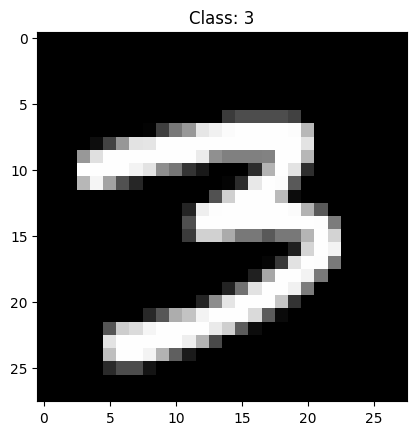

In [31]:
# Randomly checking the data
idx = np.random.randint(0, digits_data.shape[0])
plt.imshow(digits_data[idx], cmap='gray')
plt.title('Class: ' + str(digits_labels[idx]))

<Axes: xlabel='Labels', ylabel='count'>

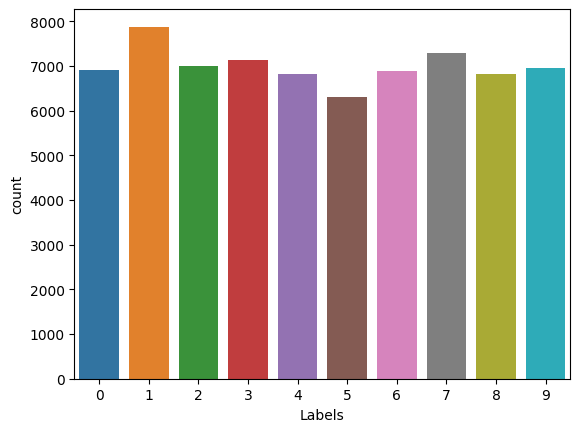

In [32]:
# Check data distribution
df_labels = pd.DataFrame(digits_labels, columns=['Labels'])
sns.countplot(df_labels, x='Labels')

**Load Kaggle A-Z**

In [33]:
!wget https://iaexpert.academy/arquivos/alfabeto_A-Z.zip

--2023-12-17 03:39:30--  https://iaexpert.academy/arquivos/alfabeto_A-Z.zip
Resolving iaexpert.academy (iaexpert.academy)... 162.159.134.42
Connecting to iaexpert.academy (iaexpert.academy)|162.159.134.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 193643888 (185M) [application/zip]
Saving to: ‘alfabeto_A-Z.zip’

alfabeto_A-Z.zip    100%[===================>] 184.67M  79.2MB/s    in 2.3s    

2023-12-17 03:39:32 (79.2 MB/s) - ‘alfabeto_A-Z.zip’ saved [193643888/193643888]



In [34]:
# Extract zip file
zip_object = zipfile.ZipFile(file = 'alfabeto_A-Z.zip', mode = 'r')
zip_object.extractall('./')
zip_object.close()

In [35]:
dataset_az = pd.read_csv('A_Z Handwritten Data.csv').astype('float32')
dataset_az

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# Get pixel data only
alphabet_data = dataset_az.drop('0', axis=1)
# Get labels only
alphabet_labels = dataset_az['0']

In [37]:
# Check shape data
alphabet_data.shape, alphabet_labels.shape

((372450, 784), (372450,))

In [38]:
# Check shape labels
alphabet_labels.shape

(372450,)

In [39]:
# Reshape pixel data to 28*28
alphabet_data = np.reshape(alphabet_data.values, (alphabet_data.shape[0], 28, 28))
# Check the result by its shape
alphabet_data.shape

(372450, 28, 28)

Text(0.5, 1.0, 'Class: 14.0')

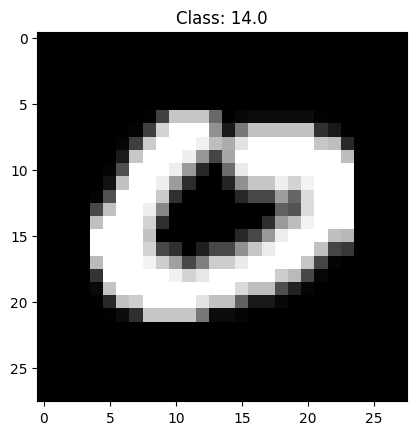

In [40]:
# Randomly checking A-Z dataset
index = np.random.randint(0, alphabet_data.shape[0])
plt.imshow(alphabet_data[index], cmap = 'gray')
plt.title('Class: ' + str(alphabet_labels[index]))

<Axes: xlabel='Labels', ylabel='count'>

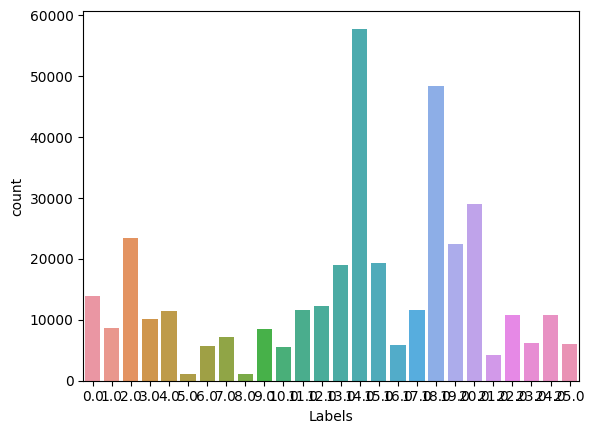

In [41]:
# Check data distribution
df_az_labels = pd.DataFrame({
    'Labels': alphabet_labels.values
})
sns.countplot(df_az_labels, x='Labels')

**Combine Dataset (MNIST + Kaggel A-Z)**

In [42]:
# Check unique value from digits_labels
np.unique(digits_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [43]:
# Check unique value from alphabet_labels
np.unique(alphabet_labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.],
      dtype=float32)

In [44]:
# We already know that digits labels containt labels from 0-9 (10 labels)
# We also know that alphabet labels start from 0-25 which represent A-Z
# If we want to combine them, the A-Z labels should continuing the digits label

alphabet_labels += 10

In [45]:
# check alphabet labels again
np.unique(alphabet_labels)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
       23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.],
      dtype=float32)

In [46]:
# Combine both of them
data = np.vstack([alphabet_data, digits_data])
labels = np.hstack([alphabet_labels, digits_labels])

In [47]:
# Check the shape
data.shape, labels.shape

((442450, 28, 28), (442450,))

In [48]:
# Check labels
np.unique(labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35.], dtype=float32)

In [49]:
# Convert data to float32
data = np.array(data, dtype = 'float32')

In [50]:
# Since Convolutional need 3d data (including depth)
# and our images only in 2d data (because in grayscale format)
# we need to add "the depth" to the data
data = np.expand_dims(data, axis=-1)

# check shape
data.shape

(442450, 28, 28, 1)

**Preprocessing**

In [51]:
# Normalize data
data /= 255.0

In [52]:
# Check range value of data
data[0].min(), data[0].max()

(0.0, 1.0)

In [53]:
# Enconde the labels
# LabelBinarizer similar with OneHotEncoder
le = LabelBinarizer()
labels = le.fit_transform(labels)

In [54]:
# Check labels shape
labels.shape

(442450, 36)

Text(0.5, 1.0, '[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]')

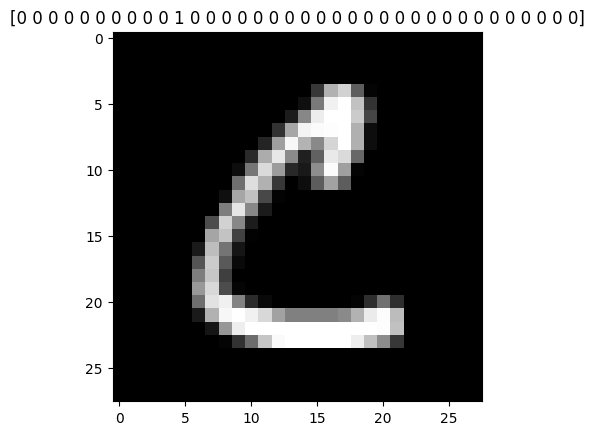

In [55]:
# Check data with label binarizer's label
plt.imshow(data[30000].reshape(28,28), cmap='gray')
plt.title(str(labels[0]))

In [56]:
# Since our data is not balance, we will handle it by giving weight for 'small' data

# Check number of data for each labels first
classes_total = labels.sum(axis = 0)
classes_total

array([ 6903,  7877,  6990,  7141,  6824,  6313,  6876,  7293,  6825,
        6958, 13869,  8668, 23409, 10134, 11440,  1163,  5762,  7218,
        1120,  8493,  5603, 11586, 12336, 19010, 57825, 19341,  5812,
       11566, 48419, 22495, 29008,  4182, 10784,  6272, 10859,  6076])

In [57]:
# Check the biggest value of data
classes_total.max()

57825

In [58]:
# Create a weight for each data
classes_weights = {}
for i in range(0, len(classes_total)):
  #print(i)
  classes_weights[i] = classes_total.max() / classes_total[i]

# Check the weight for each data
classes_weights

{0: 8.376792698826597,
 1: 7.340992763742541,
 2: 8.272532188841202,
 3: 8.097605377398123,
 4: 8.473769050410317,
 5: 9.15967052114684,
 6: 8.409685863874346,
 7: 7.928835870012341,
 8: 8.472527472527473,
 9: 8.310577752227651,
 10: 4.169370538611291,
 11: 6.671089063221043,
 12: 2.4702037677816224,
 13: 5.7060390763765545,
 14: 5.0546328671328675,
 15: 49.72055030094583,
 16: 10.035577924331829,
 17: 8.011221945137157,
 18: 51.629464285714285,
 19: 6.808548216178029,
 20: 10.320364090665715,
 21: 4.990937338166753,
 22: 4.6875,
 23: 3.0418200946870066,
 24: 1.0,
 25: 2.989762680316426,
 26: 9.94924294562973,
 27: 4.999567698426422,
 28: 1.1942625828703608,
 29: 2.5705712380529007,
 30: 1.993415609487038,
 31: 13.827116212338593,
 32: 5.362110534124629,
 33: 9.21954719387755,
 34: 5.3250759738465785,
 35: 9.51695194206715}

**Split Data to Train and Test**

In [59]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 1, stratify = labels)

**Create Data Augmentation**

In [60]:
# Import library
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [61]:
augmentation = ImageDataGenerator(rotation_range = 10, zoom_range=0.05, width_shift_range=0.1,
                                  height_shift_range=0.1, horizontal_flip = False)

**Build CNN Model**

In [62]:
# Import library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [63]:
# Build the network
network = Sequential()

network.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu', padding='same'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters = 128, kernel_size=(3,3), activation='relu', padding='valid'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Flatten())

network.add(Dense(64, activation = 'relu'))
network.add(Dense(128, activation = 'relu'))

# output
network.add(Dense(36, activation='softmax'))

network.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [64]:
# Check network summary
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

In [65]:
# Create actual labels
name_labels = '0123456789'
name_labels += 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
name_labels = [l for l in name_labels]

# Check actual label
print(name_labels)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [66]:
import joblib

joblib.dump(name_labels, "labels.pkl")

['labels.pkl']

In [67]:
a = joblib.load("labels.pkl")
print(a)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


**Train model**

In [68]:
# Set model name, epoch, and batch size
file_model = 'custom_ocr.model'
epochs = 20
batch_size = 128

In [69]:
# Setup checkpoint
checkpointer = ModelCheckpoint(file_model, monitor = 'val_loss', verbose = 1, save_best_only=True)

In [70]:
# Fit the model
history = network.fit(augmentation.flow(X_train, y_train, batch_size=batch_size),
                      validation_data = (X_test, y_test),
                      steps_per_epoch = len(X_train) // batch_size, epochs=epochs,
                      class_weight = classes_weights, verbose=1, callbacks=[checkpointer])

Epoch 1/20
2765/2765 [==============================] - ETA: 0s - loss: 2.2339 - accuracy: 0.8206
Epoch 1: val_loss improved from inf to 0.36967, saving model to custom_ocr.model
2765/2765 [==============================] - 546s 197ms/step - loss: 2.2339 - accuracy: 0.8206 - val_loss: 0.3697 - val_accuracy: 0.8481
Epoch 2/20
2765/2765 [==============================] - ETA: 0s - loss: 0.9976 - accuracy: 0.8998
Epoch 2: val_loss improved from 0.36967 to 0.26988, saving model to custom_ocr.model
2765/2765 [==============================] - 538s 195ms/step - loss: 0.9976 - accuracy: 0.8998 - val_loss: 0.2699 - val_accuracy: 0.8834
Epoch 3/20
2765/2765 [==============================] - ETA: 0s - loss: 0.8218 - accuracy: 0.9121
Epoch 3: val_loss did not improve from 0.26988
2765/2765 [==============================] - 535s 193ms/step - loss: 0.8218 - accuracy: 0.9121 - val_loss: 0.2861 - val_accuracy: 0.8784
Epoch 4/20
2765/2765 [==============================] - ETA: 0s - loss: 0.7327 - a

**Save and load The Model**

In [71]:
# The result will show in colab directory
save_path ='/content/drive/MyDrive/PCVK/UAS/model/model.h5'
network.save(save_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [72]:
save_path = '/content/drive/MyDrive/PCVK/UAS/model/model.h5'
load_network = load_model(save_path)


**Evaluate Model - Make a Single Prediction**

In [73]:
# make a prediction
predictions = load_network.predict(X_test, batch_size=batch_size)

692/692 [==============================] - 29s 42ms/step


In [74]:
# Check prediction for data-0
# You will get the probability for each label
# The highest one is the prediction
predictions[10]

array([2.8174921e-10, 3.2234634e-10, 4.0503866e-07, 1.6710588e-05,
       1.4268589e-09, 7.6094583e-02, 1.5941423e-06, 1.9023440e-12,
       1.3723290e-07, 1.1751599e-06, 8.9433549e-10, 3.4862046e-07,
       2.5262123e-08, 3.7023547e-08, 1.6781790e-08, 3.6982559e-11,
       2.2001084e-05, 1.1899885e-07, 4.2870963e-12, 6.8583445e-06,
       9.0929986e-10, 4.3313818e-08, 8.6665630e-13, 2.1281030e-09,
       1.0033062e-09, 2.3371310e-08, 7.2401879e-10, 8.6749202e-12,
       9.2385602e-01, 1.3875227e-08, 1.6218357e-11, 3.1499461e-13,
       1.0651827e-15, 2.3465499e-13, 9.0379144e-09, 3.2673070e-10],
      dtype=float32)

In [75]:
# Get the actual prediction -> highest probability
np.argmax(predictions[10])

28

In [76]:
# Check label for 24
name_labels[28]

'S'

In [77]:
# Check y_test label for 0
y_test[10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [78]:
# check the highest value
np.argmax(y_test[10])

28

In [79]:
# Check the label of y_test 0
name_labels[np.argmax(y_test[10])]

'S'

**Evaluate Model - Make an Evaluation on Test Data**

In [80]:
# Evaluate on test data
load_network.evaluate(X_test, y_test)

2766/2766 [==============================] - 38s 14ms/step - loss: 0.1997 - accuracy: 0.9218


[0.19972392916679382, 0.9217538833618164]

In [81]:
# Print Classification Report
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names = name_labels))

              precision    recall  f1-score   support

           0       0.24      0.76      0.36      1381
           1       0.95      0.99      0.97      1575
           2       0.86      0.99      0.92      1398
           3       0.91      0.99      0.95      1428
           4       0.89      0.97      0.93      1365
           5       0.59      0.96      0.73      1263
           6       0.93      0.97      0.95      1375
           7       0.92      0.99      0.95      1459
           8       0.97      0.98      0.97      1365
           9       0.98      0.96      0.97      1392
           A       1.00      0.98      0.99      2774
           B       0.98      0.98      0.98      1734
           C       0.99      0.96      0.98      4682
           D       0.76      0.98      0.86      2027
           E       0.98      0.99      0.99      2288
           F       0.94      1.00      0.97       233
           G       0.98      0.93      0.95      1152
           H       0.96    

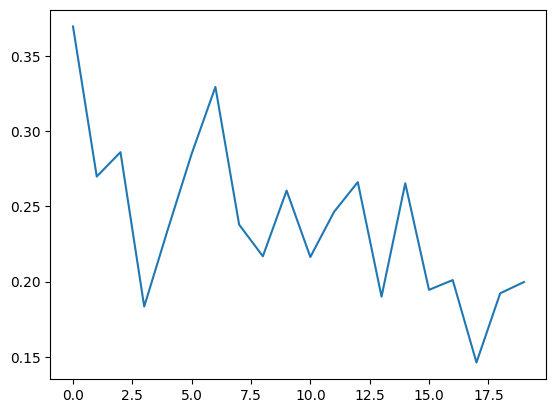

In [82]:
# Visualize loss value for each epoch
plt.plot(history.history['val_loss'])

In [83]:
# You can also check the another metrics
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

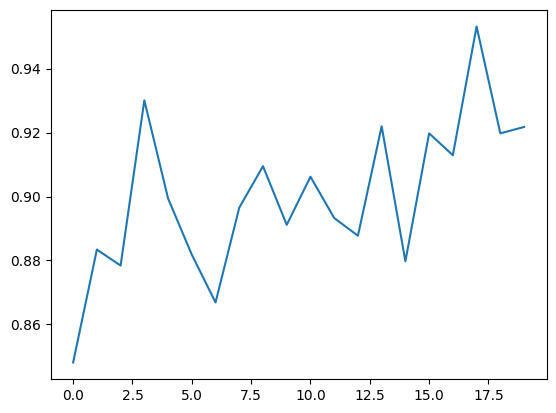

In [84]:
# Check the model performance by validation accuracy
plt.plot(history.history['val_accuracy'])

**Testing on Real Image**

In [85]:
# Import library
from tensorflow.keras.models import load_model

In [86]:
save_path = '/content/drive/MyDrive/PCVK/UAS/model/model.h5'
load_network = load_model(save_path)

In [87]:
# Check summary
load_network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

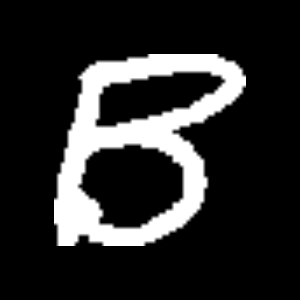

In [88]:
# Load Image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/PCVK/UAS/model/B.png')
cv2_imshow(img)

In [89]:
# Check shape
img.shape

(300, 300, 3)

In [90]:
# Convert to gray
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# check shape
gray_img.shape

(300, 300)

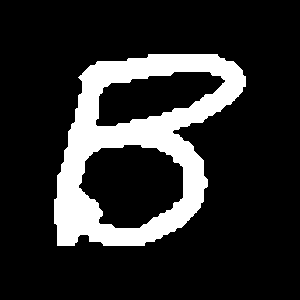

123.0


In [91]:
# Pre-process
# Binary Threshold and Otsu
value, thresh = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

cv2_imshow(thresh)

# print threshold value
print(value)

In [92]:
# Resize image in order to match network input shape -> 28*28
img_resize = cv2.resize(gray_img, (28,28))
cv2_imshow(img_resize)

In [93]:
img_resize.shape

(28, 28)

In [94]:
# Convert to float 32
# and extend the dimension since network input shape is 28*28*1
img_input = img_resize.astype('float32') / 255 # also perform normalization
img_input = np.expand_dims(img_input, axis=-1) # insert depth

# check shape
img_input.shape

(28, 28, 1)

In [95]:
# Add "amount of data" as dimension
img_input = np.reshape(img_input, (1,28,28,1))
img_input.shape

(1, 28, 28, 1)

In [96]:
# Make a predition
prediction = load_network.predict(img_input)
pred_label = np.argmax(prediction) # predict actual label
pred_label

1/1 [==============================] - 0s 102ms/step


11

In [97]:
# check label for 6
name_labels[11]

'B'

# **Character Recognition**

In [98]:
#img  = cv2.imread('/content/drive/MyDrive/PCVK/UAS/3D_2141720239_1_Rafi.jpeg')

# show image
#cv2_imshow(img)

**Crop Image**

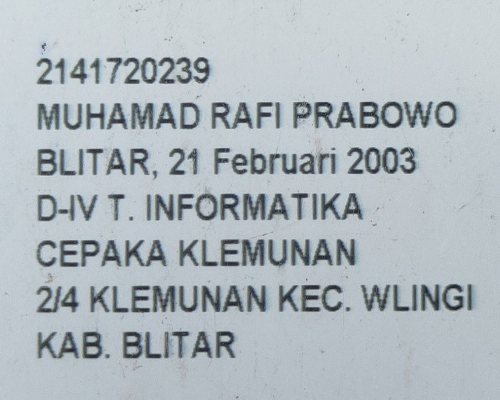

In [99]:

img1 = cv2.imread('/content/drive/MyDrive/PCVK/UAS/3D_2141720239_1_Rafi.jpeg')
new_width, new_height = 1800, 1200

img = cv2.resize(img1, (new_width, new_height))
img = img[400:800, 650:1150]
# show image
cv2_imshow(img)


**Convert to Gray**

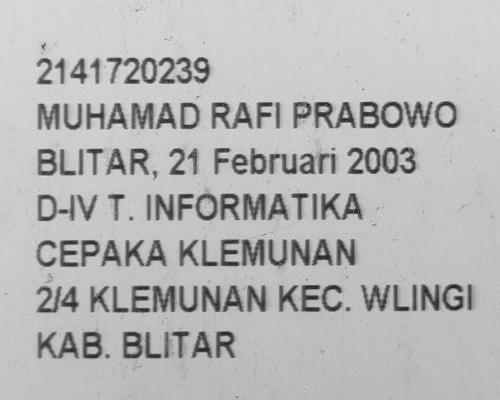

In [100]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# show
cv2_imshow(gray)

**Remove Noise -> Gaussian Blur**

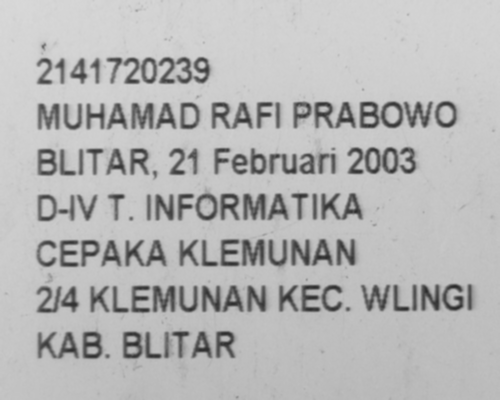

In [101]:
blur = cv2.GaussianBlur(gray, (3,3), 0)
# check
cv2_imshow(blur)

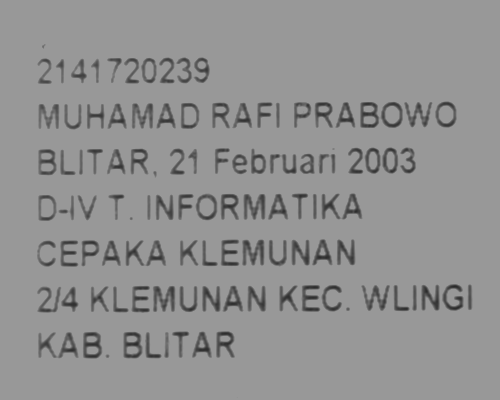

In [102]:
# Lakukan thresholding pada citra yang telah di-blur
ret, thresh_rafi = cv2.threshold(blur.copy(), 152, 255, cv2.THRESH_TRUNC)

cv2_imshow(thresh_rafi)

**Adaptive Thresholding**

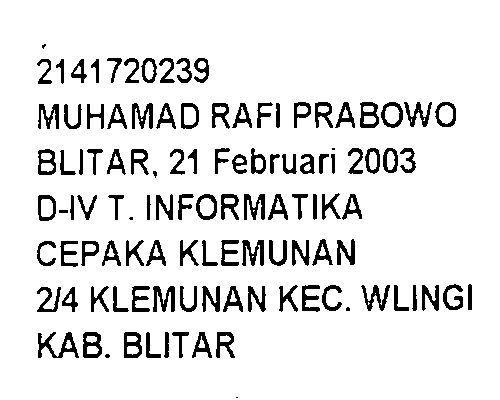

In [103]:
adaptive = cv2.adaptiveThreshold(thresh_rafi, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 1)
# check
cv2_imshow(adaptive)

**Invertion**

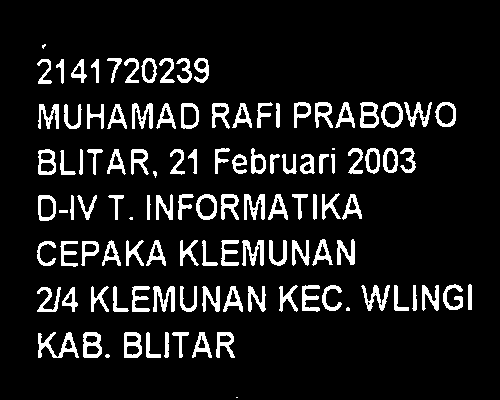

In [104]:
# inverse image since we trained out model
# with black background
invertion = 255 - adaptive
# check
cv2_imshow(invertion)

**Dilation**

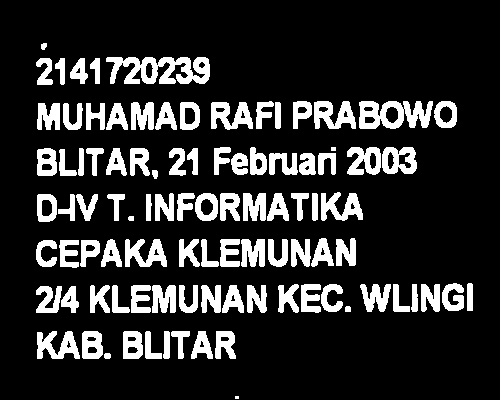

In [105]:
dilation = cv2.dilate(invertion, np.ones((3,3)))
# check
cv2_imshow(dilation)

**Edge Detection**

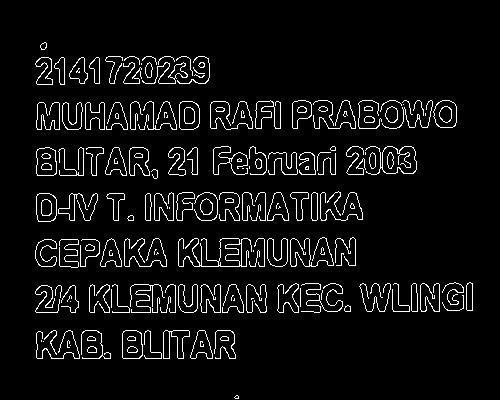

In [106]:
edges = cv2.Canny(dilation, 40, 150)
cv2_imshow(edges)

**Erode**

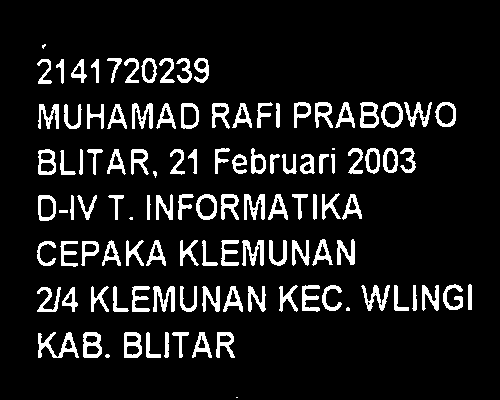

In [107]:
# Test erode
erode = cv2.erode(invertion, np.ones((1,1)))
cv2_imshow(erode)

**Pre-processing - Contour Detection**

In [108]:
# Define function for contour detection
def find_contours(img):
  conts = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  conts = imutils.grab_contours(conts)
  conts = sort_contours(conts, method='left-to-right')[0]

  return conts

In [109]:
conts = find_contours(erode.copy())

In [110]:
len(conts)

112

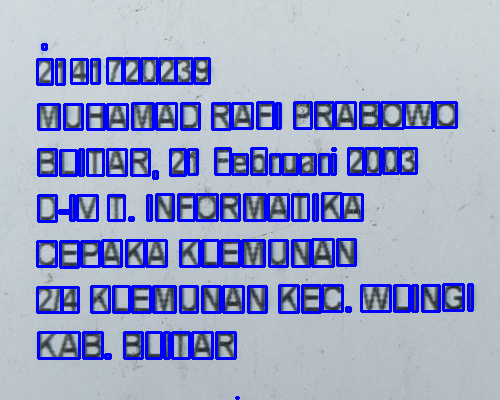

In [111]:
# Get the char based on contour

# Setup min/max width/hight for char
min_w, max_w = 10, 160
min_h, max_h = 14, 140
img_copy = img.copy() # original image for plotting countour result

for c in conts:
  (x, y, w, h) = cv2.boundingRect(c) # find bounding box based on contour
  # if(w >= min_w and w <= max_w) and (h >= min_h and h <= max_h): # if pixel follow this rule, it consider as char
  roi = gray[y:y+h, x:x+w] # get region of interest for char
  thresh = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
  cv2_imshow(thresh) # check

  # Build bounding box on original image
  cv2.rectangle(img_copy, (x,y), (x+w, y+h), (255,0,0), 2)

# Show bounding box on original image
cv2_imshow(img_copy)

**ROI extraction**

In [112]:
def extract_roi(img):
  roi = img[y:y+h, x:x+w]

  return roi

# Thresholding
def thresholding(img):
  thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
  return thresh

# Resizing
def resize_img(img, w, h):
  if w > h:
    resized = imutils.resize(img, width=28)
  else:
    resized = imutils.resize(img, height=28)

  # (w, h) = resized.shape
  (h, w) = resized.shape

  # Calculate how many pixels need to fill char image
  dX = int(max(0, 28 - w) / 2.0)
  dY = int(max(0, 28 - h) / 2.0)

  filled = cv2.copyMakeBorder(resized, top=dY, bottom=dY, right=dX, left=dX, borderType=cv2.BORDER_CONSTANT, value=(0,0,0))
  filled = cv2.resize(filled, (28,28))

  return filled

In [113]:
# Demo for enlarge
(x, y, w, h) = cv2.boundingRect(conts[1])
test_image = thresholding(gray[y:y+h, x:x+w])

# show original test image
cv2_imshow(test_image)

# Show enlarge test image
cv2_imshow(cv2.resize(test_image, (28,28)))

In [114]:
# Demo by filled strategy
# (w, h) = test_image.shape
(h, w) = test_image.shape

test_image2 = resize_img(test_image, w, h)

cv2_imshow(test_image)
cv2_imshow(test_image2)

**Normalization**

In [115]:
def normalization(img):
  img = img.astype('float32') / 255.0 # convert to floating point
  img = np.expand_dims(img, axis=-1) # add depth
  return img

In [116]:
# Check
test_image2.shape, normalization(test_image2).shape

((28, 28), (28, 28, 1))

**Detection**

In [117]:
def process_box(gray, x, y, w, h):

  roi = extract_roi(gray)
  thresh = thresholding(roi)
  (h, w) = thresh.shape
  resized = resize_img(thresh, w, h)

  # show result
  cv2_imshow(resized)

  normalized = normalization(resized)

  return (normalized, (x, y, w, h))

In [118]:
# Detect every single char from contour
detected_char = []

for c in conts:
  (x, y, w, h ) = cv2.boundingRect(c)

  min_w, max_w = 10, 160
  min_h, max_h = 14, 140

  if(w >= min_w and w <= max_w) and (h >= min_h and h <= max_h):
    detected_char.append(process_box(gray, x, y, w, h))

In [119]:
detected_char[0][0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.7490196 ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.2509804 ],
        [1.        ],
        [1.        ],
        [1.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.73333335],
        [0.96862745],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [0.8784314 ],
        [0.8784314 ],
        [0.14509805],
        

In [120]:
# check bounding box for detected char sample
detected_char[0][1]

(37, 287, 24, 25)

In [121]:
# Get all char pixel
pixels = np.array([px[0] for px in detected_char], dtype='float32')

# Get all box for detected char
boxes = [box[1] for box in detected_char]

In [122]:
pixels.shape

(92, 28, 28, 1)

**Recognize Character**

In [123]:
digits = '0123456789'
letters = 'ABCDEFGHIJKLMNOPQRSTUVWZYZ'
char_list = digits + letters
char_list = [ch for ch in char_list]

print(char_list)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'Z', 'Y', 'Z']


In [124]:
save_path = '/content/drive/MyDrive/PCVK/UAS/model/model.h5'
load_network = load_model(save_path)

In [125]:
# Predict
preds = load_network.predict(pixels)

3/3 [==============================] - 0s 11ms/step


In [126]:
# Char Prediction
for p in preds:
  char_idx = np.argmax(p)
  print(char_list[char_idx], end = " ")

2 C 2 M D B M E L A U A V P B T H K A A A 7 T L B 2 K R E M D L A M N A 2 2 T 3 F U K D A 3 0 N L R F R E R A C A M M N D F A U L K U N T P 2 E A R L C K A N A 2 B H N U U L 3 H N U G 

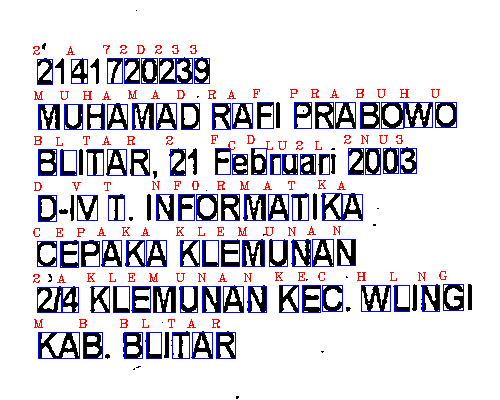

In [143]:
# Show char with actual image
img_copy2 = cv2.imread('/content/drive/MyDrive/PCVK/UAS/crop_image/rafi_crop.png')

for(pred, (x, y, w, h)) in zip(preds, boxes):
  i = np.argmax(pred)
  char_detected = char_list[i]

  cv2.rectangle(img_copy2, (x, y), (x+w, y+h), (255,0,0), 1)
  cv2.putText(img_copy2, char_detected, (x - 5, y - 5), cv2.FONT_HERSHEY_COMPLEX, 0.4, (0,0,255), 1)

cv2_imshow(img_copy2)

# **Implementasi KTM**

**Load Data**

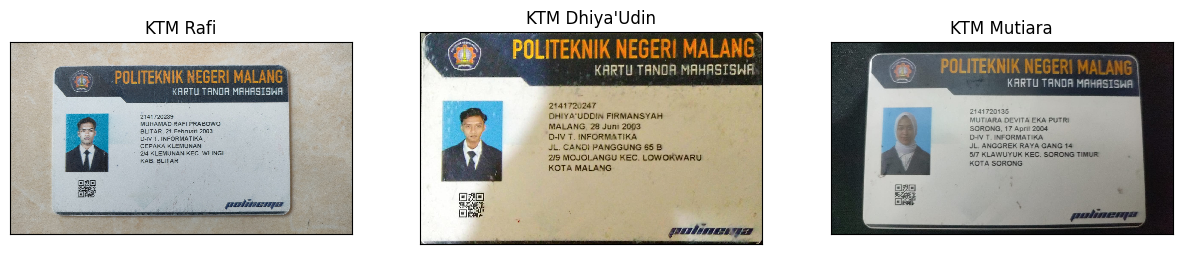

In [128]:
ktm_ori_rafi = cv2.imread('/content/drive/MyDrive/PCVK/UAS/3D_2141720239_1_Rafi.jpeg')
ktm_rgb_rafi = cv2.cvtColor(ktm_ori_rafi, cv2.COLOR_BGR2RGB)

ktm_ori_udin = cv2.imread('/content/drive/MyDrive/PCVK/UAS/3E_2141720247_1_Udin.jpg')
ktm_rgb_udin = cv2.cvtColor(ktm_ori_udin, cv2.COLOR_BGR2RGB)

ktm_ori_mutiara = cv2.imread('/content/drive/MyDrive/PCVK/UAS/3G_2141720135_1_Mutiara.jpeg')
ktm_rgb_mutiara = cv2.cvtColor(ktm_ori_mutiara, cv2.COLOR_BGR2RGB)

ktm = [ktm_rgb_rafi, ktm_rgb_udin, ktm_rgb_mutiara]
nama = ["KTM Rafi", "KTM Dhiya'Udin", "KTM Mutiara"]

plt.figure(figsize=(15, 5))

for i in range(len(ktm)):
    plt.subplot(1, 3, i + 1)
    plt.imshow(ktm[i], interpolation='nearest')
    plt.title(nama[i])
    plt.xticks([]), plt.yticks([])

plt.show()

**crop image**

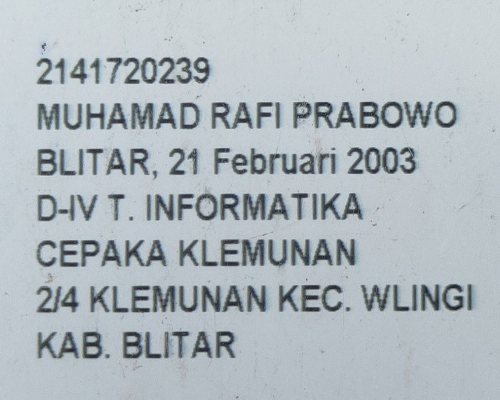

In [129]:
img_ktm1 = cv2.imread('/content/drive/MyDrive/PCVK/UAS/3D_2141720239_1_Rafi.jpeg')
new_width, new_height = 1800, 1200

resized_img_ktm1 = cv2.resize(img_ktm1, (new_width, new_height))
resized_img_ktm1 = resized_img_ktm1[400:800, 650:1150]
# show image
cv2_imshow(resized_img_ktm1)

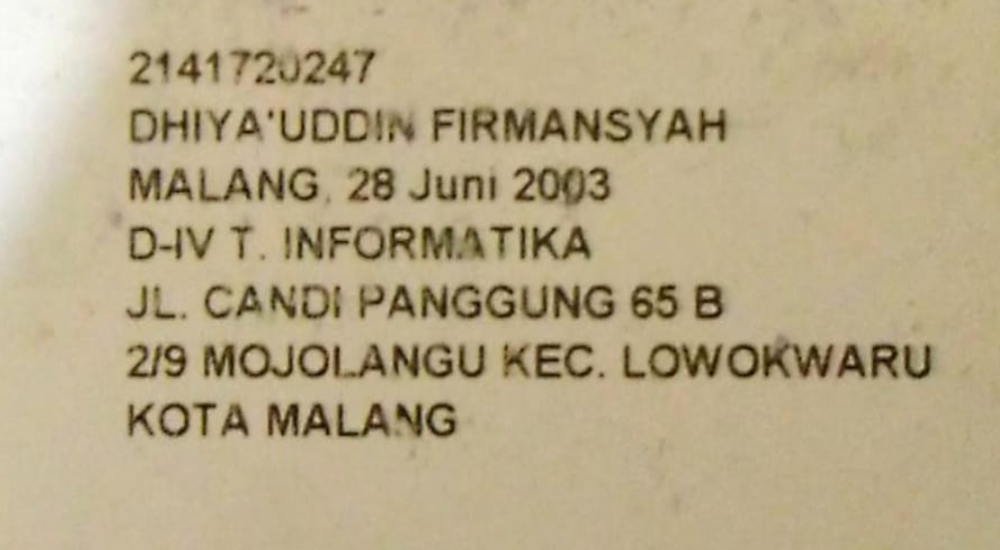

In [130]:
img_ktm2 = cv2.imread('/content/drive/MyDrive/PCVK/UAS/3E_2141720247_1_Udin.jpg')

resized_img_ktm2 = cv2.resize(img_ktm2, (new_width, new_height))
resized_img_ktm2 = resized_img_ktm2[350:900, 550:1550]
# show image
cv2_imshow(resized_img_ktm2)

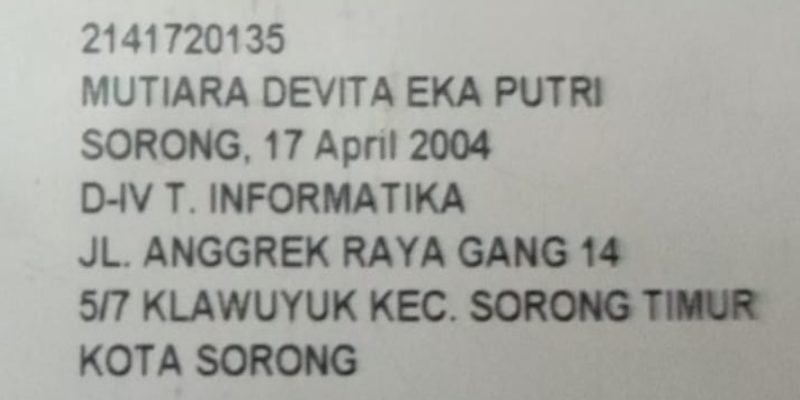

In [131]:
img_ktm3 = cv2.imread('/content/drive/MyDrive/PCVK/UAS/3G_2141720135_1_Mutiara.jpeg')
new_width, new_height = 1800, 1200

resized_img_ktm3 =cv2.resize(img_ktm3, (new_width, new_height))
resized_img_ktm3 = resized_img_ktm3[400:800, 650:1450]
# show image
cv2_imshow(resized_img_ktm3)

**Implementasi**

In [138]:
def predict(image):
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  blur = cv2.GaussianBlur(gray, (3,3), 0)
  adaptive = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 1)
  invertion = 255 - adaptive
  erode = cv2.erode(invertion, np.ones((1,1)))
  cv2_imshow(erode)

  conts = find_contours(erode.copy())

  min_w, max_w = 10, 160
  min_h, max_h = 14, 140
  img_copy = image.copy() # original image for plotting countour result
  detected_char = []

  for c in conts:
    (x, y, w, h) = cv2.boundingRect(c) # find bounding box based on contour
    if(w >= min_w and w <= max_w) and (h >= min_h and h <= max_h): # if pixel follow this rule, it consider as char
      roi = gray[y:y+h, x:x+w] # get region of interest for char
      thresh = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
      # cv2_imshow(thresh) # check

      # Build bounding box on original image
      cv2.rectangle(img_copy, (x,y), (x+w, y+h), (255,0,0), 2)
      (h, w) = thresh.shape
      resized = resize_img(thresh, w, h)
      normalized = normalization(resized)
      detected_char.append((normalized, (x, y, w, h)))


  pixels = np.array([px[0] for px in detected_char], dtype='float32')

  # Get all box for detected char
  boxes = [box[1] for box in detected_char]

  # Predict
  preds = load_network.predict(pixels)

  # Char Prediction
  for p in preds:
    char_idx = np.argmax(p)

  # Show char with actual image
  img_copy2 = image.copy()

  for(pred, (x, y, w, h)) in zip(preds, boxes):
    i = np.argmax(pred)
    char_detected = char_list[i]

    cv2.rectangle(img_copy2, (x, y), (x+w, y+h), (255,0,0), 1)
    cv2.putText(img_copy2, char_detected, (x - 5, y - 5), cv2.FONT_HERSHEY_COMPLEX, 0.4, (0,0,255), 1)
  return img_copy2

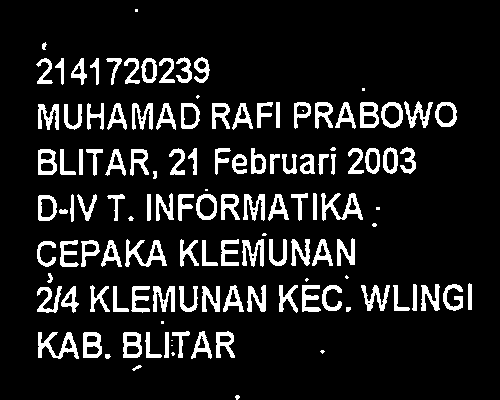

3/3 [==============================] - 0s 11ms/step


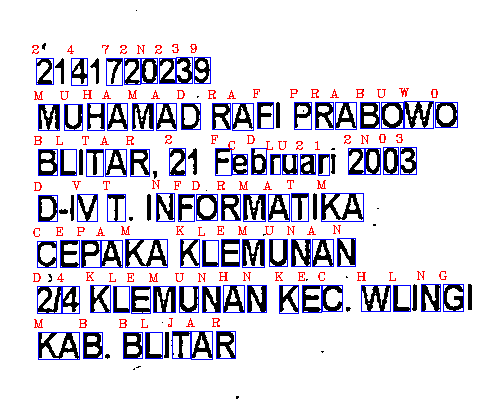

In [139]:
img = cv2.imread('/content/drive/MyDrive/PCVK/UAS/crop_image/rafi_crop.png')
cv2_imshow(predict(img))

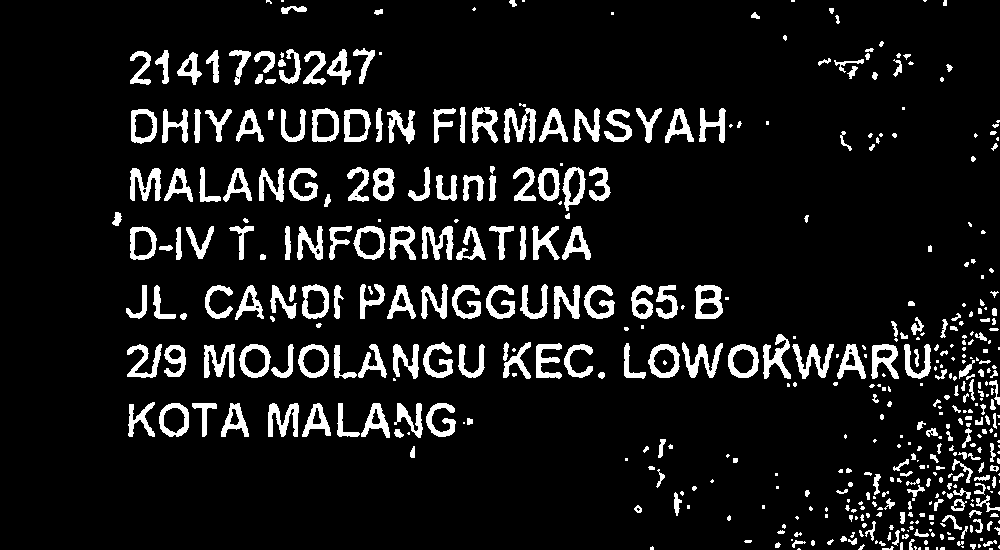

4/4 [==============================] - 0s 12ms/step


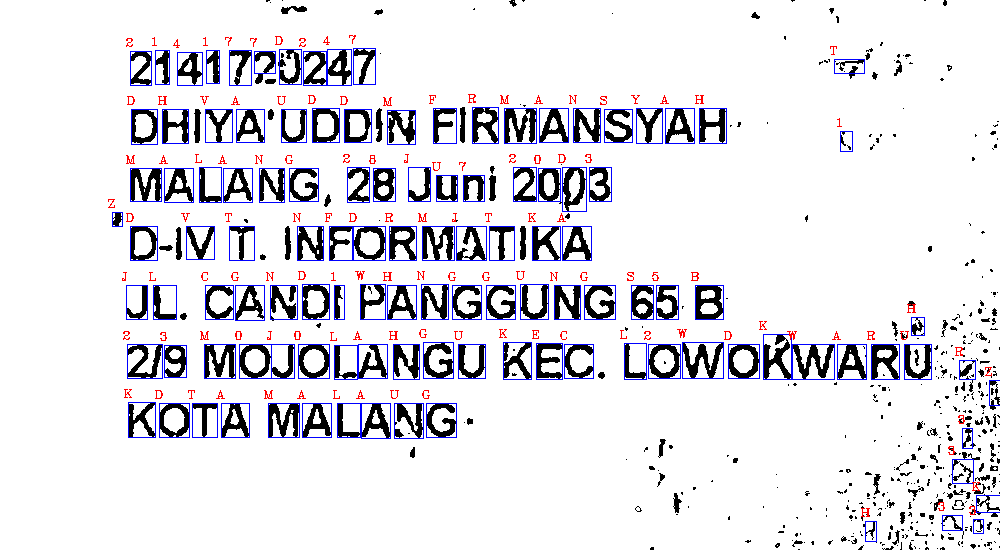

In [140]:
img = cv2.imread('/content/drive/MyDrive/PCVK/UAS/crop_image/udin_crop.png')
cv2_imshow(predict(img))

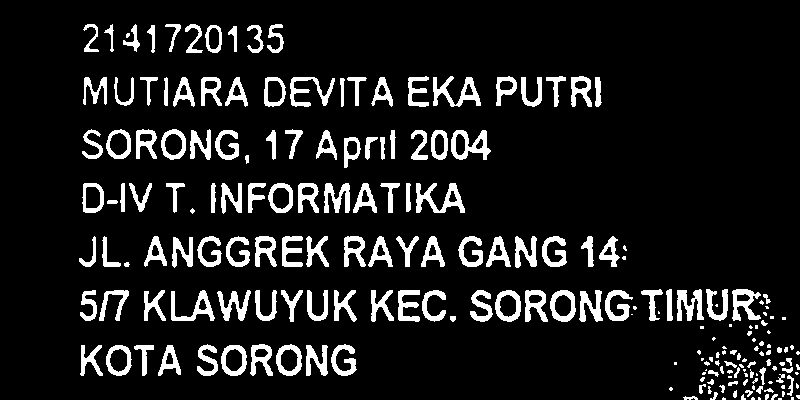

4/4 [==============================] - 0s 33ms/step


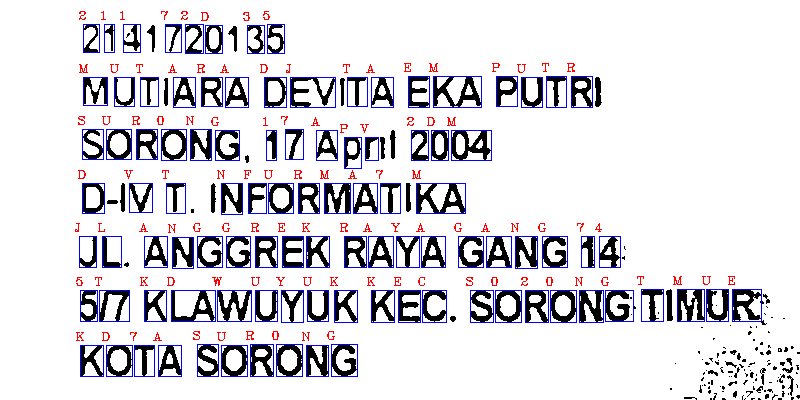

In [145]:
img = cv2.imread('/content/drive/MyDrive/PCVK/UAS/crop_image/muti_crop.png')
cv2_imshow(predict(img))